In [137]:
!pip install tensorflow

In [138]:
!pip install lightgbm

In [139]:
!pip install graphviz

In [140]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
import random
import numpy as np
from lightgbm import LGBMClassifier, plot_tree, LGBMRegressor
import seaborn as sbn

In [141]:
churned_color = "#E83F6F"
not_churned_color = "#2274A5"
test_size = 0.2
# Generate seeds for data splitting and data training used in any random operation to allow reproducability
data_split_seed = 10000
seed = random.randint(0, 2 << 31)
print(f"Random Seed: {seed}")

Random Seed: 3723763317


In [142]:
def float_converter(x):
    try:
        return float(x)
    except:
        return None

In [143]:
def int_converter(x):
    try:
        f = float_converter(x)
        if f != int(f):
            return None
        else:
            return int(f)
    except:
        return None


In [144]:
def binary_converter(x):
    i = int_converter(x)
    if i is not None:
        if i == 0 or i == 1:
            return i
    return None

In [145]:
data1_url = "https://raw.githubusercontent.com/ray33ee/Understanding-predicting-and-preventing-churn/main/data1.csv"
data2_url = "https://raw.githubusercontent.com/ray33ee/Understanding-predicting-and-preventing-churn/main/data2.csv"
df1 = pd.read_csv(data1_url, header=0)
df2 = pd.read_csv(data2_url, header=0)

C:\Users\willc\AppData\Local\Temp\ipykernel_23368\3945644888.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(data2_url, header=0)


In [146]:
columns_to_drop = ["customer_id"]
df1.drop(columns_to_drop, inplace=True, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [147]:
columns_to_drop = ["Surname", "Surname_tfidf_0", "Surname_tfidf_1", "Surname_tfidf_2", "Surname_tfidf_3", "Surname_tfidf_4", "Mem__no__Products", "Cred_Bal_Sal", "Bal_sal", "Tenure_Age", "Age_Tenure_product"]
df2.drop(columns_to_drop, inplace=True, axis=1)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      175028 non-null  float64
 1   Age              175028 non-null  float64
 2   Tenure           175028 non-null  float64
 3   Balance          175028 non-null  float64
 4   NumOfProducts    175028 non-null  float64
 5   HasCrCard        175028 non-null  int64  
 6   IsActiveMember   175028 non-null  int64  
 7   EstimatedSalary  175028 non-null  object 
 8   Exited           175028 non-null  int64  
 9   France           175028 non-null  int64  
 10  Germany          175028 non-null  int64  
 11  Spain            175028 non-null  int64  
 12  Female           175028 non-null  int64  
 13  Male             175028 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 18.7+ MB


In [148]:
# These values are integers, and using the map function we replace any invalid values with null
convert_integer = ["CreditScore", "Age", "Tenure", "NumOfProducts"]
for column in convert_integer:
    df2[column] = df2[column].map(int_converter)

In [149]:
# These values are floating values, and using the map function we replace any invalid values with null
convert_float = ["EstimatedSalary", "Balance"]
for column in convert_float:
    df2[column] = df2[column].map(float_converter)

In [150]:
# These values are binary integers, and using map we replace any invalid values with null
convert_binary = ["HasCrCard", "IsActiveMember", "Exited", "France", "Germany", "Spain", "Female", "Male"]
for column in convert_float:
    df2[column] = df2[column].map(float_converter)

In [151]:
df2.isnull().sum()

CreditScore        0
Age                5
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    2
Exited             0
France             0
Germany            0
Spain              0
Female             0
Male               0
dtype: int64

In [152]:
df2.isna().sum()

CreditScore        0
Age                5
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    2
Exited             0
France             0
Germany            0
Spain              0
Female             0
Male               0
dtype: int64

In [153]:
df2.dropna(inplace=True)

In [154]:
df2 = df2.astype({"CreditScore": "int64", "Age": "int64", "Tenure": "int64", "NumOfProducts": "int64"})
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175021 entries, 0 to 175027
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      175021 non-null  int64  
 1   Age              175021 non-null  int64  
 2   Tenure           175021 non-null  int64  
 3   Balance          175021 non-null  float64
 4   NumOfProducts    175021 non-null  int64  
 5   HasCrCard        175021 non-null  int64  
 6   IsActiveMember   175021 non-null  int64  
 7   EstimatedSalary  175021 non-null  float64
 8   Exited           175021 non-null  int64  
 9   France           175021 non-null  int64  
 10  Germany          175021 non-null  int64  
 11  Spain            175021 non-null  int64  
 12  Female           175021 non-null  int64  
 13  Male             175021 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 20.0 MB


In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [156]:
df1 = pd.get_dummies(df1, columns=['country', 'gender'], dtype='int64', prefix="", prefix_sep="")

In [157]:
rename_columns_map = {
    "credit_score": "CreditScore",
    "age": "Age",
    "tenure": "Tenure",
    "balance": "AccountBalance", "Balance": "AccountBalance",
    "products_number": "NumOfProducts",
    "HasCrCard": "HasCreditCard",
    "credit_card": "HasCreditCard", 
    "active_member": "IsActiveMember", 
    "Exited": "Churned", "churn": "Churned", 
    "estimated_salary": "EstimatedSalary"
    
}

In [158]:
df1.rename(rename_columns_map, axis=1, inplace=True)
df2.rename(rename_columns_map, axis=1, inplace=True)

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   AccountBalance   10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCreditCard    10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Churned          10000 non-null  int64  
 9   France           10000 non-null  int64  
 10  Germany          10000 non-null  int64  
 11  Spain            10000 non-null  int64  
 12  Female           10000 non-null  int64  
 13  Male             10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175021 entries, 0 to 175027
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      175021 non-null  int64  
 1   Age              175021 non-null  int64  
 2   Tenure           175021 non-null  int64  
 3   AccountBalance   175021 non-null  float64
 4   NumOfProducts    175021 non-null  int64  
 5   HasCreditCard    175021 non-null  int64  
 6   IsActiveMember   175021 non-null  int64  
 7   EstimatedSalary  175021 non-null  float64
 8   Churned          175021 non-null  int64  
 9   France           175021 non-null  int64  
 10  Germany          175021 non-null  int64  
 11  Spain            175021 non-null  int64  
 12  Female           175021 non-null  int64  
 13  Male             175021 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 20.0 MB


In [161]:
data_url = "https://raw.githubusercontent.com/ray33ee/bank-churn-analysis/main/merged.csv"

In [162]:
df = pd.concat([df1, df2])

In [163]:
df.head()

,CreditScore,Age,Tenure,AccountBalance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churned,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185021 entries, 0 to 175027
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      185021 non-null  int64  
 1   Age              185021 non-null  int64  
 2   Tenure           185021 non-null  int64  
 3   AccountBalance   185021 non-null  float64
 4   NumOfProducts    185021 non-null  int64  
 5   HasCreditCard    185021 non-null  int64  
 6   IsActiveMember   185021 non-null  int64  
 7   EstimatedSalary  185021 non-null  float64
 8   Churned          185021 non-null  int64  
 9   France           185021 non-null  int64  
 10  Germany          185021 non-null  int64  
 11  Spain            185021 non-null  int64  
 12  Female           185021 non-null  int64  
 13  Male             185021 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 21.2 MB


In [165]:
df.isna().sum()

CreditScore        0
Age                0
Tenure             0
AccountBalance     0
NumOfProducts      0
HasCreditCard      0
IsActiveMember     0
EstimatedSalary    0
Churned            0
France             0
Germany            0
Spain              0
Female             0
Male               0
dtype: int64

In [166]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
AccountBalance     0
NumOfProducts      0
HasCreditCard      0
IsActiveMember     0
EstimatedSalary    0
Churned            0
France             0
Germany            0
Spain              0
Female             0
Male               0
dtype: int64

In [167]:
df.describe()

,CreditScore,Age,Tenure,AccountBalance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churned,France,Germany,Spain,Female,Male
count,185021.000000,185021.000000,185021.000000,185021.000000,185021.000000,185021.00000,185021.000000,185021.000000,185021.000000,185021.000000,185021.000000,185021.000000,185021.000000,185021.000000
mean,655.810978,38.211889,5.019565,57747.369724,1.551835,0.74872,0.499641,111226.810629,0.210754,0.563374,0.214149,0.222477,0.437604,0.562396
std,82.071139,9.059775,2.815592,63109.771556,0.551039,0.43375,0.500001,51267.835902,0.407845,0.495969,0.410232,0.415911,0.496093,0.496093
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,72496.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.00000,0.000000,116160.040000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,711.000000,43.000000,7.000000,121151.050000,2.000000,1.00000,1.000000,154189.080000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
# When using head we want to remove any bias based on order, so here we shuffle the dataframe
df = shuffle(df, random_state=data_split_seed)

In [169]:
# Note: This function modifies 'data_frame' in place
def detect_outliers(data_frame, column):
    multiplier = 1.5
    q1 = data_frame[column].quantile(0.25)
    q3 = data_frame[column].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + iqr * multiplier
    lower = q1 - iqr * multiplier
    outliers_frames = data_frame.loc[(data_frame[column] < lower) | (data_frame[column] > upper)]
    indices = outliers_frames.index.values
    data_frame.drop(indices, inplace=True)
    print(f"Found and removed {len(indices)} outliers in column '{column}'")

columns_to_check = ["CreditScore", "Age", "AccountBalance", "EstimatedSalary", "Tenure", "NumOfProducts", "HasCreditCard", "IsActiveMember"]

for c in columns_to_check:
    detect_outliers(df, c)

# After shuffling and outlier removal, reset indices
df.reset_index(inplace=True, drop=True) 

Found and removed 359 outliers in column 'CreditScore'
Found and removed 5777 outliers in column 'Age'
Found and removed 0 outliers in column 'AccountBalance'
Found and removed 0 outliers in column 'EstimatedSalary'
Found and removed 0 outliers in column 'Tenure'
Found and removed 554 outliers in column 'NumOfProducts'
Found and removed 0 outliers in column 'HasCreditCard'
Found and removed 0 outliers in column 'IsActiveMember'


In [170]:
df.describe()

,CreditScore,Age,Tenure,AccountBalance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churned,France,Germany,Spain,Female,Male
count,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000,177412.000000
mean,656.242904,37.315852,5.022918,57486.227762,1.545826,0.749369,0.492458,111407.714056,0.204214,0.564460,0.213300,0.222240,0.435991,0.564009
std,81.208617,7.705112,2.813157,63081.254901,0.532989,0.433378,0.499945,51198.031996,0.403127,0.495829,0.409639,0.415753,0.495887,0.495887
min,426.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,72861.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116537.730000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,711.000000,42.000000,7.000000,121063.500000,2.000000,1.000000,1.000000,154460.972500,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,850.000000,59.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
# Split the data into two groups, the customers that have churned and ones that have not
churned_group = df.groupby(df["Churned"])
has_churned = churned_group.get_group(1)
not_churned = churned_group.get_group(0)

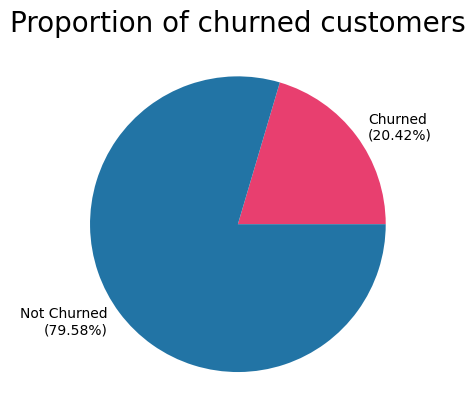

In [172]:
total_rows = len(df.index)
total_has_churned = len(has_churned.index)
churn_percentage = float(total_has_churned) / float(total_rows) * 100.0
ps = np.array([churn_percentage, 100.0 - churn_percentage])
plt.pie(ps, 
        labels=[f"Churned\n({churn_percentage:.2f}%)", f"Not Churned\n({100-churn_percentage:.2f}%)"], 
        colors=[churned_color, not_churned_color])
plt.title("Proportion of churned customers", fontsize=20)
plt.show()

In [173]:
# Convenience function to plot churned and non churned distributions side by side
def plot_dual_histogram(column, title, xlabel, ylabel):
    fig, a = plt.subplots(2)
    plt.suptitle(title, fontsize=20)
    a[0].hist(not_churned[column], color=not_churned_color)
    a[0].set_xlabel(xlabel)
    a[0].set_ylabel(ylabel)
    a[1].hist(has_churned[column], color=churned_color)
    a[1].set_xlabel(xlabel)
    a[1].set_ylabel(ylabel)
    fig.legend(["Not churned", "Churned"], bbox_to_anchor=[1.22, 0.9])
    fig.tight_layout()
    plt.show()

In [174]:
def plot_dual_barcharts(column, title, xlabel, ylabel, x=None):
    fig, a = plt.subplots(2)

    plt.suptitle(title, fontsize=20)
    
    if x is None:
        x = df[column].value_counts().sort_index().to_dict().keys()

    print(not_churned[column].value_counts().sort_index().to_dict().values())
        
    a[0].bar(x, not_churned[column].value_counts().sort_index().to_dict().values(), color=not_churned_color)
    a[0].set_xlabel(xlabel)
    a[0].set_ylabel(ylabel)

    a[1].bar(x, has_churned[column].value_counts().sort_index().to_dict().values(), color=churned_color)
    a[1].set_xlabel(xlabel)
    a[1].set_ylabel(ylabel)
    fig.legend(["Not churned", "Churned"], bbox_to_anchor=[1.22, 0.9])
    fig.tight_layout()
    plt.show()



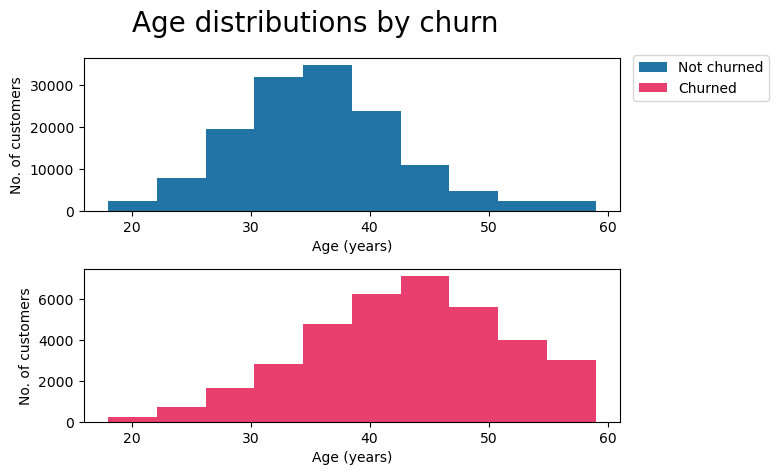

In [175]:
plot_dual_histogram("Age", "Age distributions by churn", "Age (years)", "No. of customers")

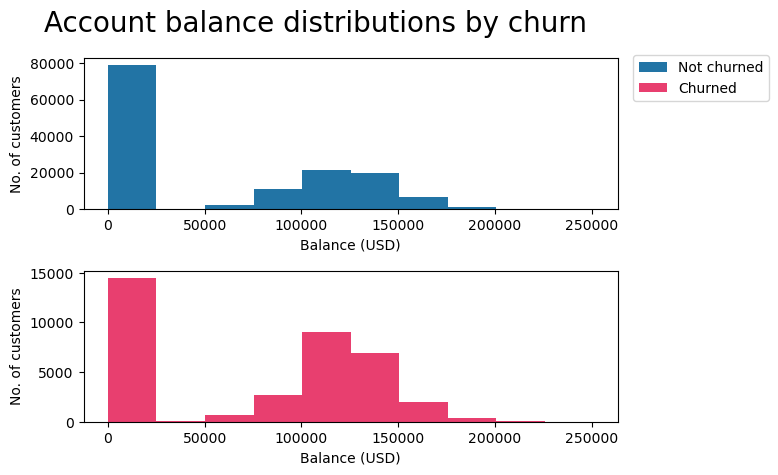

In [176]:
plot_dual_histogram("AccountBalance", "Account balance distributions by churn", "Balance (USD)", "No. of customers")

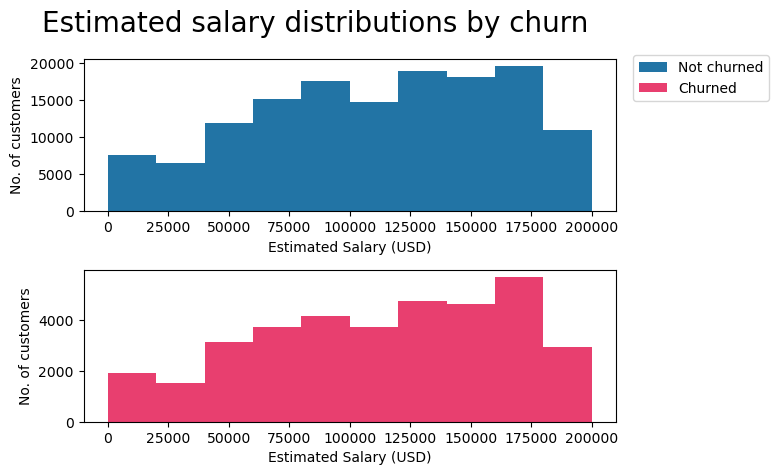

In [177]:
plot_dual_histogram("EstimatedSalary", "Estimated salary distributions by churn", "Estimated Salary (USD)", "No. of customers")

dict_values([64525, 76657])


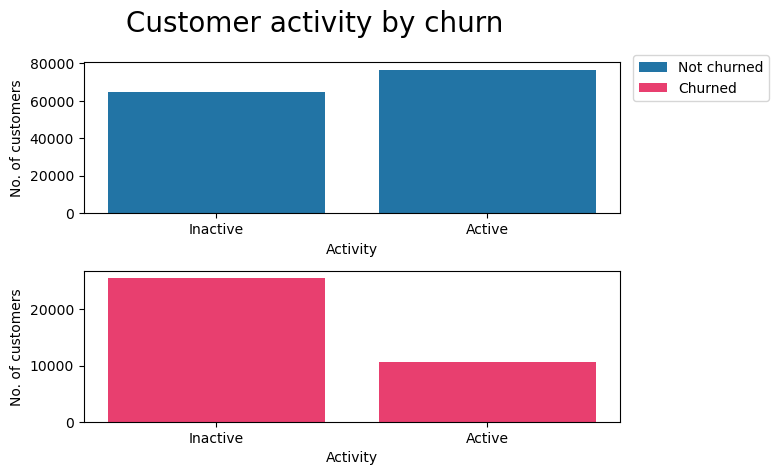

In [178]:
plot_dual_barcharts("IsActiveMember", "Customer activity by churn", "Activity", "No. of customers", x=["Inactive", "Active"])

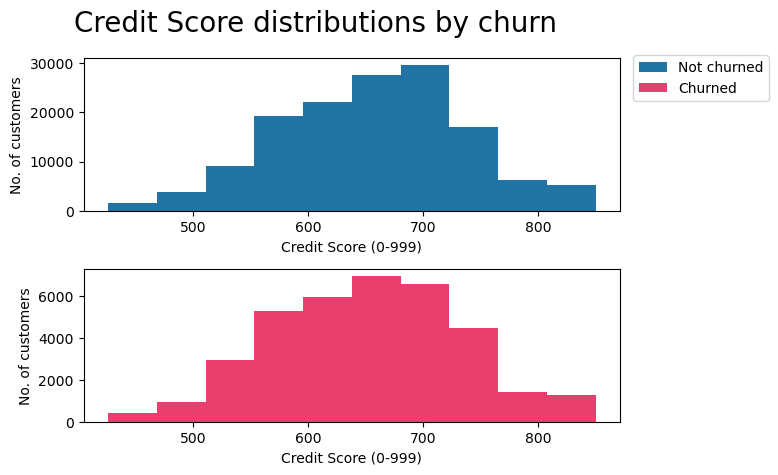

In [179]:
plot_dual_histogram("CreditScore", "Credit Score distributions by churn", "Credit Score (0-999)", "No. of customers")

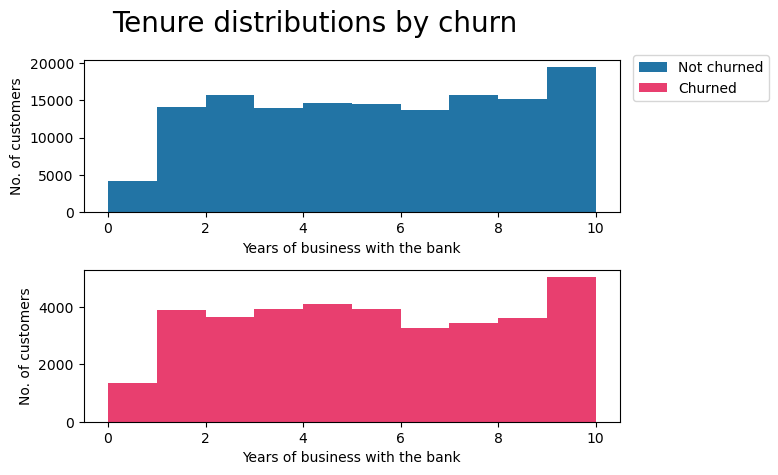

In [180]:
plot_dual_histogram("Tenure", "Tenure distributions by churn", "Years of business with the bank", "No. of customers")

dict_values([55802, 84975, 405])


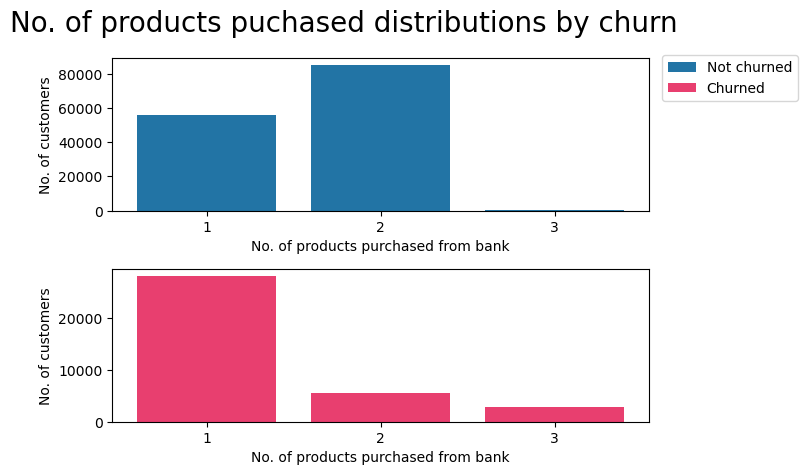

In [181]:
plot_dual_barcharts("NumOfProducts", "No. of products puchased distributions by churn", "No. of products purchased from bank", "No. of customers", x=["1", "2", "3"])

Text(0.5, 1.0, 'Correlation matrix over non-categorical features')

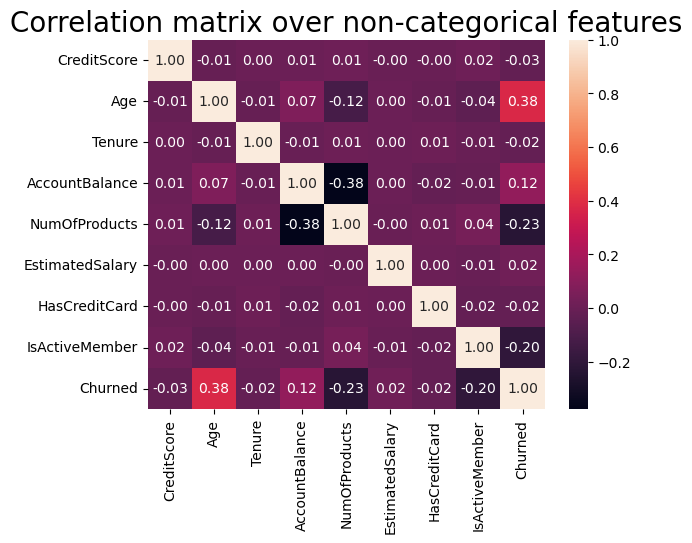

In [182]:
columns = ["CreditScore", "Age", "Tenure", "AccountBalance", "NumOfProducts", "EstimatedSalary", "HasCreditCard", "IsActiveMember", "Churned"]
cm = df[columns].corr()
sbn.heatmap(cm, annot=True, fmt=".2f").set_title("Correlation matrix over non-categorical features", fontsize=20)

In [183]:
target = "Churned"

has_churned = churned_group.get_group(1)
not_churned = churned_group.get_group(0)

X = df.drop(target, axis=1)
y = df[target]

# The following code can be used to selectively normalise certain columns. However PCA requires all data to be normalised
def normalise_column(column, data_frame):
    if column in data_frame:
        data_frame[column] = (data_frame[column] - data_frame[column].mean()) / data_frame[column].std()

columns_to_normalise = df.columns.values #["Age", "CreditScore", "Tenure", "AccountBalance", "NoOfProducts", "EstimatedSalary"]
 
for c in columns_to_normalise:
    normalise_column(c, X)
    
X.reset_index()


,index,CreditScore,Age,Tenure,AccountBalance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,0,1.499313,-0.689912,-0.719092,0.462455,-1.024084,0.578321,1.015196,-0.480812,0.878408,-0.520703,-0.534548,-0.879213,0.879213
1,1,0.686591,-1.338832,0.347326,1.096638,0.852127,0.578321,-0.985026,0.993401,-1.138417,1.920471,-0.534548,1.137374,-1.137374
2,2,0.649649,1.646199,1.769215,1.852280,0.852127,-1.729135,-0.985026,-0.360821,-1.138417,-0.520703,1.870729,1.137374,-1.137374
3,3,-0.963480,-0.170777,-0.719092,0.847218,-1.024084,-1.729135,-0.985026,0.456713,0.878408,-0.520703,-0.534548,1.137374,-1.137374
4,4,1.671708,1.775983,-0.363619,1.209639,-1.024084,0.578321,1.015196,-0.483791,-1.138417,1.920471,-0.534548,1.137374,-1.137374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177407,177407,0.378742,0.737711,-0.719092,-0.911304,0.852127,0.578321,1.015196,0.556890,-1.138417,-0.520703,1.870729,-0.879213,0.879213
177408,177408,-1.320585,-0.949480,-1.430037,0.835372,0.852127,0.578321,1.015196,-0.466237,-1.138417,1.920471,-0.534548,1.137374,-1.137374
177409,177409,-0.840341,0.997279,-1.074564,-0.911304,0.852127,0.578321,-0.985026,-0.245861,0.878408,-0.520703,-0.534548,1.137374,-1.137374
177410,177410,1.905673,-0.560128,-1.430037,0.697967,-1.024084,0.578321,1.015196,0.202299,0.878408,-0.520703,-0.534548,-0.879213,0.879213


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=data_split_seed)
X_train.describe()

,CreditScore,Age,Tenure,AccountBalance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
count,141929.000000,141929.000000,141929.000000,141929.000000,141929.000000,141929.000000,141929.000000,141929.000000,141929.000000,141929.000000,141929.000000,141929.000000,141929.000000
mean,-0.000396,-0.001348,0.001345,-0.000023,0.000470,0.001493,-0.001213,0.000129,0.000764,0.000284,-0.001191,-0.000465,0.000465
std,0.999944,0.999897,1.000567,0.999837,0.998963,0.999140,0.999982,0.999605,0.999901,1.000200,0.999204,0.999941,0.999941
min,-2.835203,-2.506888,-1.785509,-0.911304,-1.024084,-1.729135,-0.985026,-2.175789,-1.138417,-0.520703,-0.534548,-0.879213,-1.137374
25%,-0.729515,-0.689912,-0.719092,-0.911304,-1.024084,0.578321,-0.985026,-0.752876,-1.138417,-0.520703,-0.534548,-0.879213,-1.137374
50%,0.033951,-0.040993,-0.008147,-0.911304,0.852127,0.578321,-0.985026,0.099680,0.878408,-0.520703,-0.534548,-0.879213,0.879213
75%,0.674277,0.607927,0.702798,1.007754,0.852127,0.578321,1.015196,0.837379,0.878408,-0.520703,-0.534548,1.137374,0.879213
max,2.385918,2.814255,1.769215,3.066075,2.728338,0.578321,1.015196,1.730238,0.878408,1.920471,1.870729,1.137374,0.879213


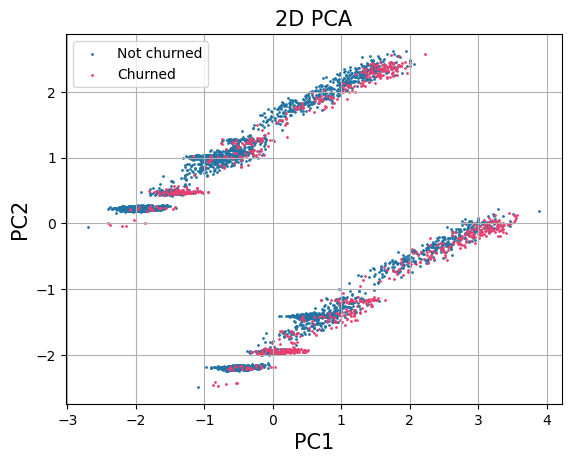

In [185]:
pca = PCA(n_components=2, random_state=seed)

components = pca.fit_transform(X)

pca2d = pd.DataFrame(data=components, columns=['pc1', 'pc2'])

pca2d.insert(2, "Churned", y)

pca2d = pca2d.head(4000)

churned_group = pca2d.groupby(pca2d["Churned"])
has_churned = churned_group.get_group(1)
not_churned = churned_group.get_group(0)

plt.xlabel("PC1", fontsize=15)
plt.ylabel("PC2", fontsize=15)
plt.title("2D PCA", fontsize=15)
plt.grid()
plt.scatter(not_churned['pc1'], 
            not_churned['pc2'], 
            c=not_churned_color,
            s=1
           )
plt.scatter(has_churned['pc1'], 
            has_churned['pc2'], 
            c=churned_color,
            s=1
           )
plt.legend(["Not churned", "Churned"])
plt.show()


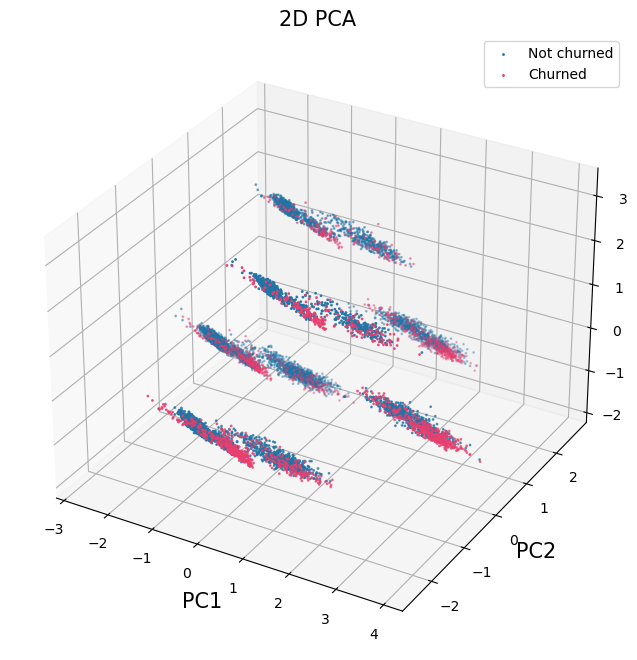

In [186]:
pca = PCA(n_components=3, random_state=seed)

components = pca.fit_transform(X)

pca3d = pd.DataFrame(data=components, columns=['pc1', 'pc2', 'pc3'])

pca3d.insert(2, "Churned", y)

pca3d = pca3d.head(10000)

churned_group = pca3d.groupby(pca3d["Churned"])
has_churned = churned_group.get_group(1)
not_churned = churned_group.get_group(0)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d') 

ax.set_xlabel("PC1", fontsize=15)
ax.set_ylabel("PC2", fontsize=15)
ax.set_title("2D PCA", fontsize=15)
ax.grid()
ax.scatter(not_churned['pc1'], 
            not_churned['pc2'], 
            not_churned['pc3'], 
            c=not_churned_color,
            s=1
           )
ax.scatter(has_churned['pc1'], 
            has_churned['pc2'], 
            has_churned['pc3'], 
            c=churned_color,
            s=1
           )
ax.legend(["Not churned", "Churned"])
plt.show()

Running model 'LGBM' training and prediction (1/8)
Running model 'LR' training and prediction (2/8)
Running model 'RF' training and prediction (3/8)
Running model 'GB' training and prediction (4/8)
Running model 'MLP' training and prediction (5/8)
Running model 'ADA' training and prediction (6/8)
Running model 'KN' training and prediction (7/8)
Running model 'LDA' training and prediction (8/8)
Epoch 1/4
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 5s 845us/step - accuracy: 0.7503 - loss: 0.5073
Epoch 2/4
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 3s 713us/step - accuracy: 0.8475 - loss: 0.3746
Epoch 3/4
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 3s 691us/step - accuracy: 0.8492 - loss: 0.3612
Epoch 4/4
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 3s 730us/step - accuracy: 0.8518 - loss: 0.3488
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step


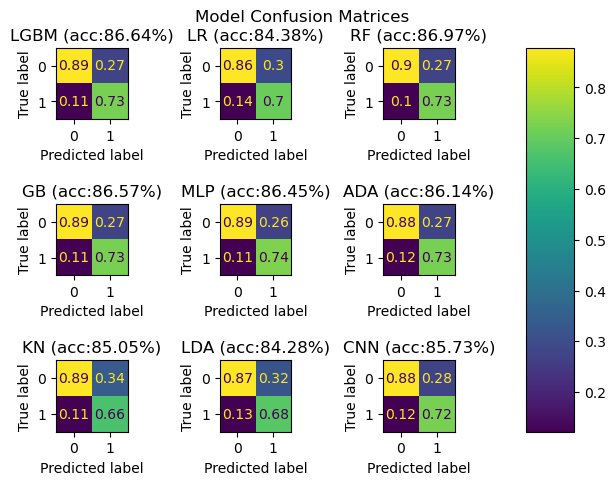

In [187]:

models = [("LGBM", LGBMClassifier(random_seed=seed, verbosity=-1)),
         ("LR", LogisticRegression(random_state=seed)),
         ("RF", RandomForestClassifier(random_state=seed)),
         ("GB", GradientBoostingClassifier(random_state=seed)),
         ("MLP", MLPClassifier(random_state=seed)),
         ("ADA", AdaBoostClassifier(random_state=seed)),
         ("KN", KNeighborsClassifier()),
         ("LDA", LinearDiscriminantAnalysis())]

cms = []

fig, axs = plt.subplots(3, 3)

plt.suptitle("Model Confusion Matrices")

for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    im = ConfusionMatrixDisplay.from_predictions(
        y_test, 
        y_predict, 
        normalize='pred', 
        ax=axs[i // 3, i % 3], 
        colorbar=False,
        
    )
    _i = im.im_
    axs[i // 3, i % 3].title.set_text(f"{name} (acc:{accuracy*100:.2f}%)")
    
    cms.append((name, cm))
    
    print(f"Running model '{name}' training and prediction ({i+1}/{len(models)})")

# CNN works by outputing two values (corresponding to confidence values for churned and not churned)
# so must be treated slightly differently to the other models:
    
y_ml_train = to_categorical(y_train)
y_ml_test = to_categorical(y_test)

epochs = 4
batch_size = 32

initialiser = keras.initializers.GlorotUniform(seed=seed)

cnn = Sequential()
cnn.add(Input((X_train.shape[1],)))
cnn.add(Dense(5, activation="sigmoid", kernel_initializer=initialiser))
cnn.add(Dense(5, activation="sigmoid", kernel_initializer=initialiser))
cnn.add(Dense(5, activation="sigmoid", kernel_initializer=initialiser))
cnn.add(Dense(2, activation="sigmoid", kernel_initializer=initialiser))

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

cnn.fit(X_train, y_ml_train, epochs=epochs, batch_size=batch_size)

y_predict = np.argmax(cnn.predict(X_test), axis=1)

accuracy = accuracy_score(y_test, y_predict)
im = ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_predict, 
    normalize='pred', 
    ax=axs[2, 2], 
    colorbar=False,

)
_i = im.im_
axs[2, 2].title.set_text(f"CNN (acc:{accuracy*100:.2f}%)")
#axs[i // 3, i % 3].xlabel("")
#axs[i // 3, i % 3].ylabel.set_text("")

cms.append(("CNN", cm))

fig.tight_layout()
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes((0.85, 0.1, 0.075, 0.8))
plt.colorbar(_i, cax=cax)
plt.show()

1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step


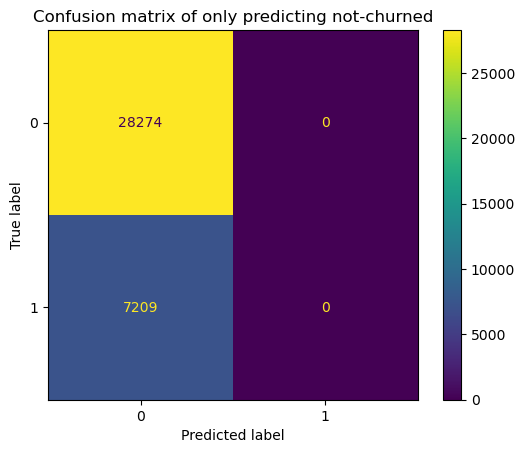

In [188]:
#A terrible CNN model that basically just guesses '0' and manages 79% accuracy because the dataset is 79% '0'.
trivial_model = keras.models.load_model('trivial_model.keras')

y_predict = np.argmax(trivial_model.predict(X_test), axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.title("Confusion matrix of only predicting not-churned")
plt.show()

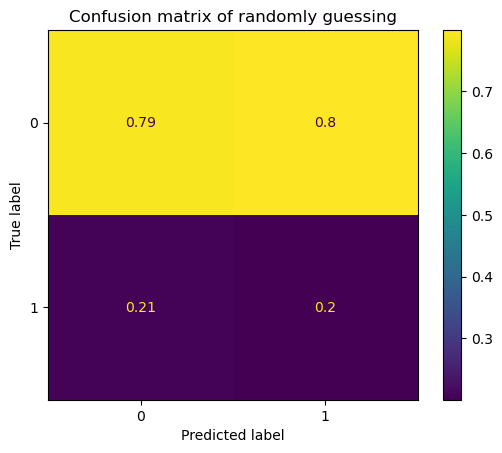

In [189]:
# Show what a confusion matrix looks like for model that just chooses values uniformly randomly
random_predictions = np.random.randint(2, size=y_test.shape[0])

ConfusionMatrixDisplay.from_predictions(y_test, random_predictions, normalize='pred')
plt.title("Confusion matrix of randomly guessing")
plt.show()